# Demand and supply

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve](#toc2_)    
- 3. [Supply vs. demand](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from consav import elapsed

from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load()

## 2. <a id='toc2_'></a>[Solve](#toc0_)

In [3]:
model.find_ss(calib_beta=False)
model.compute_jacs(skip_shocks=True)
model.find_transition_path(shocks=['shock_TFP'],do_end_check=False)
model.calc_moms_path()

## 3. <a id='toc3_'></a>[Supply vs. demand](#toc0_)

In [4]:
model_demand = model.copy()
model_demand.par.rho_shock_beta = model_demand.par.rho_shock_TFP

In [5]:
jump_shock_beta_min = 0.001
jump_shock_beta_max = 0.01

eps = 1e-3
it = 0
while True:

    jump_shock_beta = (jump_shock_beta_min+jump_shock_beta_max)/2

    model_demand.par.jump_shock_beta = jump_shock_beta

    try:

        model_demand.find_transition_path(shocks=['shock_beta'],do_end_check=False)
        model_demand.calc_moms_path()
        diff = model_demand.moms['var_u']-model.moms['var_u']

        print(f'{jump_shock_beta = :.6f}: {diff:7.4f}')

        if np.abs(diff) < eps: 
            print('converged')
            break
        elif diff < 0:
            jump_shock_beta_min = jump_shock_beta
        elif diff > 0:
            jump_shock_beta_max = jump_shock_beta

    except Exception as e:

        jump_shock_beta_max = jump_shock_beta
        print(f'{jump_shock_beta = :.6f}: {e}')

    it += 1
    if it > 100: raise ValueError('too many iterations')


jump_shock_beta = 0.005500: GEModelTools: No improvement for 5 iterations


jump_shock_beta = 0.003250: GEModelTools: No improvement for 5 iterations


jump_shock_beta = 0.002125: GEModelTools: No improvement for 5 iterations


jump_shock_beta = 0.001563: GEModelTools: No improvement for 5 iterations


jump_shock_beta = 0.001281:  0.6002


jump_shock_beta = 0.001141:  0.2615


jump_shock_beta = 0.001070:  0.1119


jump_shock_beta = 0.001035:  0.0419


jump_shock_beta = 0.001018:  0.0080


jump_shock_beta = 0.001009: -0.0087


jump_shock_beta = 0.001013: -0.0004
converged


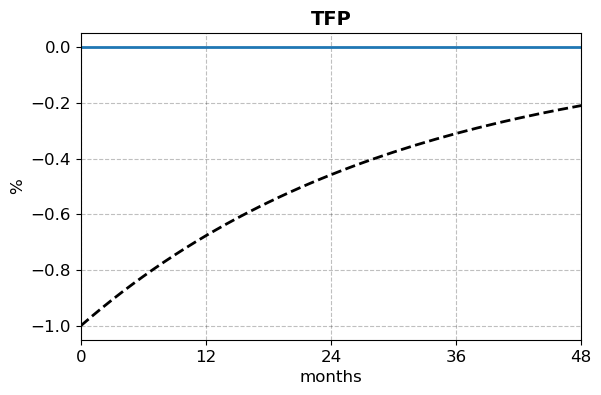

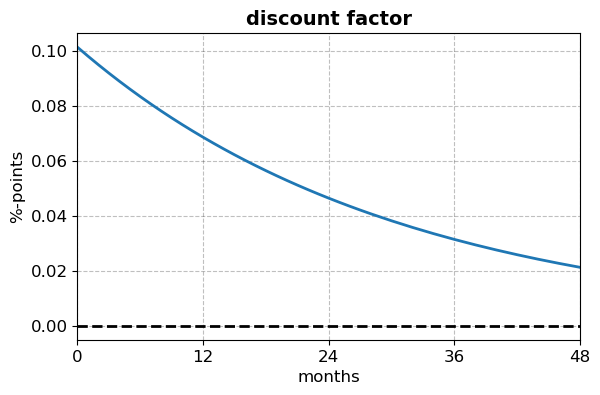

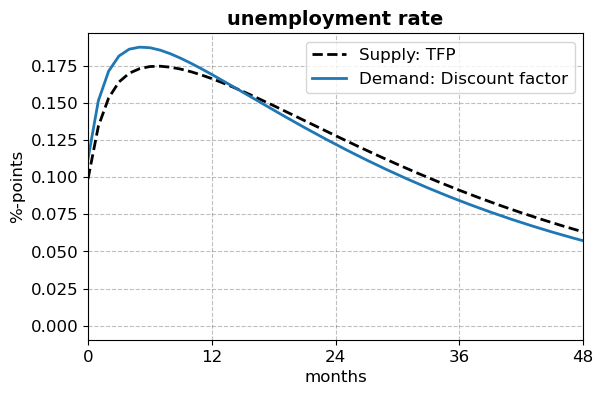

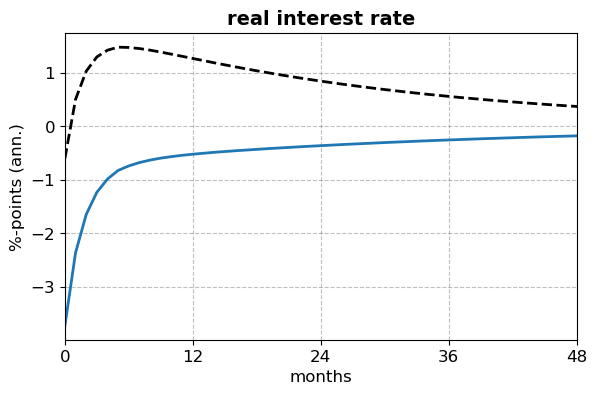

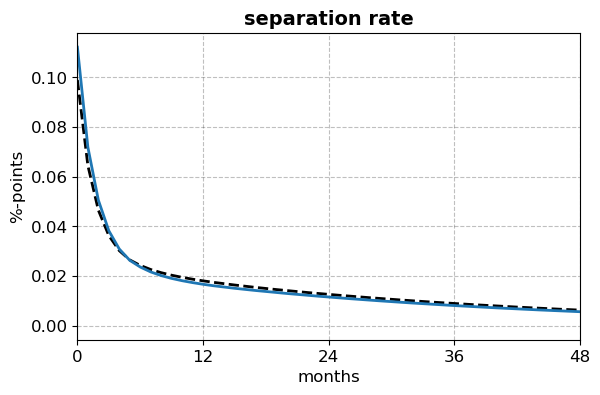

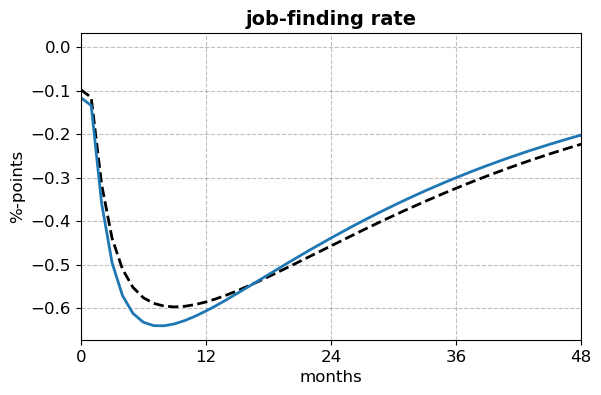

In [6]:
for varname,title in [('shock_TFP','TFP'),('shock_beta','discount factor'),
    ('u','unemployment rate'),('RealR','real interest rate'),
    ('delta','separation rate'),('lambda_u','job-finding rate')]:
    
    fig,ax = create_fig()
    
    # a. model   
    y,ylabel = model.get_IRF(varname)
    ax.plot(y,label=f'Supply: TFP',color='black',lw=2,ls='--')

    y,_ = model_demand.get_IRF(varname)
    ax.plot(y,label=f'Demand: Discount factor',lw=2)
    
    save_fig(fig,ax,
             filename=f'supply_vs_demand_shock_{varname}',
             title=title,
             ylabel=ylabel,legend=varname=='u')    